In [13]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


Reading the Data

In [ ]:
# Reading the training data
file_path_train = '/Users/sandramjose/Desktop/Kaggle_ML/Competitions/santander-customer-transaction-prediction/train.csv'
Data_train = pd.read_csv(file_path_train)

# select the target variables
y = Data_train.target
X = Data_train.iloc[:, 2:]


In [8]:
Data_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
Data_train.describe() 

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


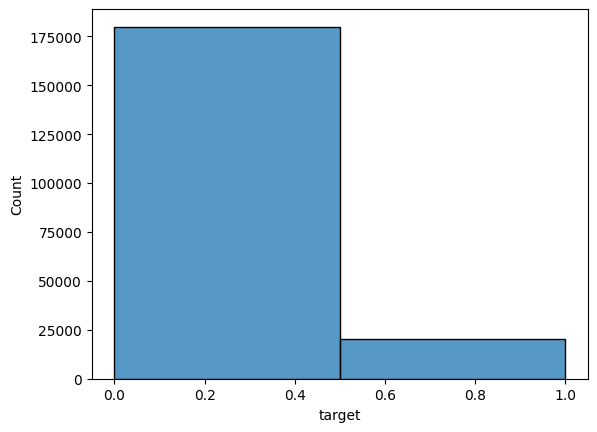

In [ ]:
# Checking the number of positive and negative target values
#y.value_counts()
sns.histplot(y, bins=2)
plt.show()

**NOTES**: target values are mostly 0

## DecisionTreeClassifier

We first attempt a decision tree classifer.

In [34]:
#
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X.describe()

# Decision Tree with minimal features
Model_DecTree = tree.DecisionTreeClassifier(random_state=1,max_depth=10)
Model_DecTree.fit(train_X, train_y)


DecisionTreeClassifier(max_depth=10, random_state=1)

In [35]:
y_train_pred = Model_DecTree.predict_proba(train_X)[:,1]
y_test_pred = Model_DecTree.predict_proba(val_X)[:,1]
auc1 = roc_auc_score(train_y, y_train_pred)
auc2 = roc_auc_score(val_y, y_test_pred)
print("AUC:", auc1, auc2)

AUC: 0.708641824535053 0.6424290488145635


This is not very good. We move to ensemble methods.

## Second Attempt
Random Forest 

In [37]:
# Starting of with an arbitrary model
Model_RFC = RandomForestClassifier(random_state=1,max_depth=10)
Model_RFC.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, random_state=1)

In [38]:
y_pred_train = Model_RFC.predict_proba(train_X)[:,1]
y_pred_test = Model_RFC.predict_proba(val_X)[:,1]
auc1 = roc_auc_score(train_y, y_pred_train)
auc2 = roc_auc_score(val_y, y_pred_test)
print("AUC:", auc1, auc2)

AUC: 0.9093580707220831 0.7981506743513873


In [40]:
for i in range(3,13,3):
    Model_RFC = RandomForestClassifier(random_state=1,max_depth=i)
    Model_RFC.fit(train_X, train_y)
    y_pred_train = Model_RFC.predict_proba(train_X)[:,1]
    y_pred_test = Model_RFC.predict_proba(val_X)[:,1]
    auc1 = roc_auc_score(train_y, y_pred_train)
    auc2 = roc_auc_score(val_y, y_pred_test)
    print(i, auc1, auc2)

3 0.7866395786924437 0.7693380413941113
6 0.8260656944746083 0.7820670165936463
9 0.8863534958615865 0.7937790723249191
12 0.9464833623325406 0.8078968698676823


## Third attempt
XGBoost

In [41]:
from xgboost import XGBClassifier
Model_XGB = XGBClassifier(max_depth=8, random_state=42,eval_metric="auc")
Model_XGB.fit(train_X, train_y)
y_pred_train = Model_XGB.predict_proba(train_X)[:,1]
y_pred_test = Model_XGB.predict_proba(val_X)[:,1]
auc1 = roc_auc_score(train_y, y_pred_train)
auc2 = roc_auc_score(val_y, y_pred_test)
print("AUC:", auc1, auc2)

AUC: 0.9996890568259886 0.8383633299320175


In [75]:
for i in range(100,500,50):
    Model_XGB = XGBClassifier(max_depth=5, random_state=42,n_estimators=i,learning_rate=0.24)
    Model_XGB.fit(train_X, train_y)
    y_pred_train = Model_XGB.predict_proba(train_X)[:,1]
    y_pred_test = Model_XGB.predict_proba(val_X)[:,1]
    auc1 = roc_auc_score(train_y, y_pred_train)
    auc2 = roc_auc_score(val_y, y_pred_test)
    print(i, auc1, auc2)

100 0.9508161527980382 0.8629011811509409
150 0.9679879048783591 0.8709953433183838
200 0.9780254017715198 0.8735285856428465
250 0.9850186316170604 0.8754382691223794
300 0.9898146444004854 0.874665071779895
350 0.9932819072214822 0.8747806984666366
400 0.9957405087422796 0.8748710059981075
450 0.9974709112539847 0.8745984086307006


We can see from the analysis earlier that most of the target values are 0. This leads us to look into StratifiedKFold.

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Model_XGB = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=9
)
scores = cross_val_score(Model_XGB, X, y, cv=skf, scoring='roc_auc')
print(scores, scores.mean())

[0.87202029 0.87484007 0.86582953 0.87305397 0.87367077] 0.871882926119825


In [43]:

#-----------------------
# Predict for test data
#----------------------
Model_XGB.fit(X, y) # Training using full data
y_pred_train = Model_XGB.predict_proba(train_X)[:,1]
print(roc_auc_score(train_y, y_pred_train))



0.9990492858969924


In [44]:
file_path_test = '/Users/sandramjose/Desktop/Kaggle_ML/Competitions/santander-customer-transaction-prediction/test.csv'
Data_test= pd.read_csv(file_path_test)

X_test = Data_test.iloc[:, 1:]
Test_ID_code = Data_test["ID_code"]
y_pred_test = Model_XGB.predict_proba(X_test)[:,1]
Data_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [45]:
Final_DF = pd.DataFrame({"ID_code" : Test_ID_code, "target" : y_pred_test})
Final_DF.to_csv("submission.csv", index=False)